In [1]:
import pandas as pd
import python_speech_features as mfcc
from scipy.io import wavfile
import os
import numpy as np
import pandas as pd
import librosa
from os.path import exists

train_csv = pd.read_csv('preprocessed/train.csv')

In [2]:
train_csv['sentence']

0         Sin esta declaración, la moneda no tendría nin...
1         Los dibujos y diseños que acompañan este disco...
2         La cucaracha marrón con bandas come una gran c...
3                    Los cargos son electivos y periódicos.
4         Tras ella, Checoslovaquia alcanzó su independe...
                                ...                        
129947    Con ocho victorias, Bianchi selló el título a ...
129948    Danielle Campbell aparecerá en un papel de inv...
129949                                           San Dámaso
129950    El nombre refiere a la utilización anterior de...
129951    Ella es parte del Equipo paralímpico de los Es...
Name: sentence, Length: 129952, dtype: object

In [3]:
files = train_csv['path'][:10000]

In [4]:
import os
import shutil

def copyTrainFiles(files):
    source_folder = r"C:\Users\Diego\Desktop\stt-es\asr\clips"
    destination_folder = r"C:\Users\Diego\Desktop\stt-es\asr\train_clips"

    for file in files:

        source = source_folder + "\\" + file
        destination = destination_folder + "\\" + file

        print(source)

        if os.path.isfile(source):
            shutil.copy(source, destination)
            print('copied', file)

In [5]:
train_csv['accents'][:20000].value_counts()

España             5688
México             4193
Andino             3174
Rioplatense        2146
Caribe             1862
América central    1769
Chileno            1168
Name: accents, dtype: int64

In [43]:
train_csv

,Unnamed: 0,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment
0,16,f73aabd1c1ff1330e393df55743441cc53260df9f92d4e...,common_voice_es_19749308.wav,"Sin esta declaración, la moneda no tendría nin...",2,1,twenties,female,México,es,NaN
1,17,f73aabd1c1ff1330e393df55743441cc53260df9f92d4e...,common_voice_es_19749309.wav,Los dibujos y diseños que acompañan este disco...,2,0,twenties,female,México,es,NaN
2,18,f73aabd1c1ff1330e393df55743441cc53260df9f92d4e...,common_voice_es_19749310.wav,La cucaracha marrón con bandas come una gran c...,2,0,twenties,female,México,es,NaN
3,19,f73aabd1c1ff1330e393df55743441cc53260df9f92d4e...,common_voice_es_19749311.wav,Los cargos son electivos y periódicos.,2,0,twenties,female,México,es,NaN
4,20,f73aabd1c1ff1330e393df55743441cc53260df9f92d4e...,common_voice_es_19749357.wav,"Tras ella, Checoslovaquia alcanzó su independe...",2,1,twenties,female,México,es,NaN
...,...,...,...,...,...,...,...,...,...,...,...
129947,215740,a97730f86fa90560ae105669364412a9ad393b32839d01...,common_voice_es_25094588.wav,"Con ocho victorias, Bianchi selló el título a ...",2,0,sixties,male,España,es,NaN
129948,215741,a97730f86fa90560ae105669364412a9ad393b32839d01...,common_voice_es_25143392.wav,Danielle Campbell aparecerá en un papel de inv...,2,0,sixties,male,España,es,NaN
129949,215742,a97730f86fa90560ae105669364412a9ad393b32839d01...,common_voice_es_25325879.wav,San Dámaso,2,0,sixties,male,España,es,NaN
129950,215743,a97730f86fa90560ae105669364412a9ad393b32839d01...,common_voice_es_25358269.wav,El nombre refiere a la utilización anterior de...,2,0,sixties,male,España,es,NaN


In [6]:
x_train = train_csv[:20000]

In [7]:
espana = x_train[x_train['accents']=='España']
mexico = x_train[x_train['accents']=='México']

x_train = pd.concat([espana,mexico])

In [8]:
x_train['accents'].value_counts()

España    5688
México    4193
Name: accents, dtype: int64

In [9]:
ds_path = "./clips/"

#this function is used to extract audio frequency features
def feature_extraction(filename, sampling_rate=48000, mfcc_num=20):
    path = "{}{}".format(ds_path, filename)
    features = list()
    audio, _ = librosa.load(path, sr=sampling_rate)
    
    accents = train_csv[train_csv['path'] == filename].accents.values[0]
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sampling_rate))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sampling_rate))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sampling_rate))
    features.append(accents)
    features.append(spectral_centroid)
    features.append(spectral_bandwidth)
    features.append(spectral_rolloff)
    
    # Extract mfcc features. First experiment
    
    mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=mfcc_num) # it returns 20 by default.
    for el in mfcc:
        features.append(np.mean(el))
    
    return features
    
        
features = feature_extraction(train_csv['path'][16])
print("features: ", features)


features:  ['México', 2308.2947933508694, 1974.1844882438925, 4629.628258293839, -494.77393, 58.007782, -12.609498, 4.0877666, 5.2569146, -0.3378335, 9.516813, -1.3414289, -2.8885732, 4.024781, -4.650512, -2.1086526, 2.949276, -2.73439, -1.9973722, -1.9965124, -1.5547327, 3.239418, -0.24454787, -2.8529255]


In [63]:
def create_df_features(orig, n_mfcc =20):
    new_rows = list()
    tot_rows = len(orig)-1
    stop_counter = len(orig)
    counter = 0
    
    missing_files = []
        
    for idx, row in orig.iterrows():
        
        if counter == stop_counter:
            break
        
        print("\r", end="")
        
        print("{}/{}".format(counter, tot_rows), end="", flush=True)
        
        filename = row['path']
        
        # check if the file exists
        
        if exists("./clips/" + str(filename)):

            features = feature_extraction(filename, mfcc_num=n_mfcc)

            new_rows.append(features)
            
        else:
            missing_files.append(filename)
            
        
        counter=counter + 1
    
    column_names = ["accent", "spectral_centroid", "spectral_bandwidth", "spectral_rolloff"]
    
    for n in range(n_mfcc):
        mfcc_column = "mfcc"+ str(n+1)
        column_names.append(mfcc_column)
        
    result = pd.DataFrame(new_rows, columns=column_names)
    
    return result,missing_files


# test the feature extraction function with only 10 files

data = x_train

# this file was missing and crashed the process
#data = train_csv[train_csv['path']=='common_voice_es_30936612.wav']

#df_features, missing_files = create_df_features(data,13)
### It works, but it will take time to run. Reduce size of data

9880/9880

In [183]:
df_features = pd.read_csv('./mfcc_es_mx.csv')

In [184]:
df_features = df_features.drop(['Unnamed: 0'],axis=1)

In [49]:
from sklearn.preprocessing import LabelEncoder

def get_labels(data):
    labels = data.iloc[:, 0]
    encoder = LabelEncoder()
    labels = encoder.fit_transform(labels)
    return labels, encoder

y, encoder = get_labels(df_features)
classes = encoder.classes_
print("Before encoding:", df_features.iloc[0].values[0])
print("\nAfter encoding:", y[0])
print("\nClasses:", classes)

Before encoding: España

After encoding: 0

Classes: ['España' 'México']


In [50]:
from sklearn.preprocessing import StandardScaler

def scale_features(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(np.array(data.iloc[:, 1:], dtype = float))
    # with data.iloc[:, 0:-1] we don't consider the label column
        
    return scaled_data, scaler

x, scaler = scale_features(df_features)

In [170]:
from sklearn import svm

clf = svm.SVC(C=100, gamma='scale', probability = True)
clf.fit(x, y)

SVC(C=100, probability=True)

In [175]:
def plot_confusion_matrix(cm, classes, normalize=False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized Confusion Matrix"
    else:
        title = "Confusion Matrix (without normalization)"
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.title(title)

    thresh = cm.max() / 2.
    fmt = "{:0.2f}" if normalize else "{:d}"
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, fmt.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [171]:
train_csv.iloc[19802]

Unnamed: 0                                                46281
client_id     be8611f7ef3512aad172a40920d62ccb116cca0e31eeed...
path                               common_voice_es_21979847.wav
sentence      Le acompañaron en el podio Carlos Barbero y Je...
up_votes                                                      2
down_votes                                                    1
age                                                    twenties
gender                                                   female
accents                                                  México
locale                                                       es
segment                                                     NaN
Name: 19802, dtype: object

In [172]:
features = feature_extraction(train_csv['path'][19802],mfcc_num=13)
print("features: ", features)

features:  ['México', 803.271364504542, 1052.419904934252, 1355.1453849337747, -413.2601, 133.18007, 32.108383, 13.177162, 15.628123, 2.7738242, -1.7067066, -3.44792, -6.4243393, -6.2456803, -5.950353, -2.947172, -1.3192308]


In [176]:
x_test = features[1:]
#Classes: ['España' 'México']
y_pred = clf.predict_proba([x_test])

In [169]:
#from sklearn.metrics import confusion_matrix

In [182]:
cm = confusion_matrix(features, y_pred)

plt.figure()
plot_confusion_matrix(cm, classes=classes)

plt.grid(False)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [17, 1]

In [83]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=1)
gmm.fit(x,y)
gmm.means_

array([[-0.36352107, -0.94745238, -0.52395264, -0.09490706,  0.04703249,
        -0.03074402, -0.56963886, -0.0094321 , -0.17800018, -0.62766502,
        -0.03275288, -0.26973778, -0.44998448,  0.07141271, -0.60018542,
        -0.36970464],
       [ 0.09472828,  0.24689224,  0.1365344 ,  0.02473139, -0.01225598,
         0.00801144,  0.14843956,  0.00245787,  0.04638424,  0.16356033,
         0.00853492,  0.07028972,  0.11725938, -0.01860911,  0.15639955,
         0.09633962]])

In [97]:
# ['España' 'México']
gmm.predict([x_test])

array([1], dtype=int64)

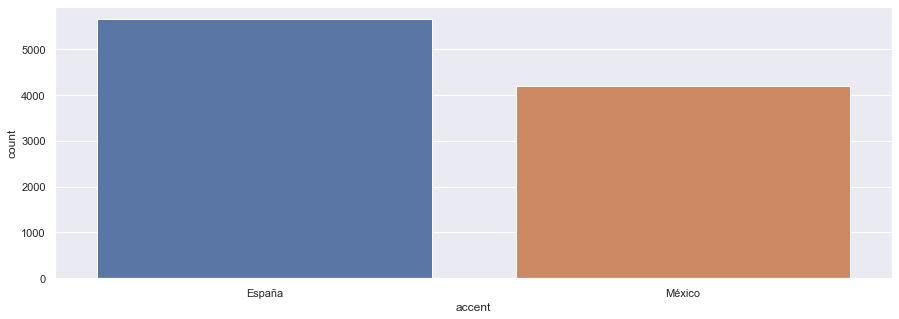

In [104]:
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns # visualizing data with stunning default theme


sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="accent", 
        data=df_features[df_features['accent'].notna()])

plt.show()